# Demonstration of Custom Neural Network

In [25]:
import sys
import os

# Modify path variables to see root of directory
curr_dir = os.getcwd()
parent_dir = os.path.dirname(curr_dir)
sys.path.append(parent_dir)

## Python Package Imports
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import numpy as np

## Custom Module Imports
from loss_functions.mean_square_error import mean_square_error
from activation_functions.LeakyReLU import LeakyReLU
from neural_networks.SimpleNeuralNetwork import SimpleNeuralNetwork

Testing the neural network on the prepackaged diabetes data from `sklearn.datasets`.
Begin by importing and splitting the data. Next, initialize the neural network.

In [26]:
# Testing single instance
diabetes = load_diabetes()
scaler = StandardScaler()
scaler.fit(diabetes.data)
X_transformed = scaler.transform(diabetes.data)
scaler.fit(diabetes.target.reshape(-1,1))
y_transformed = scaler.transform(diabetes.target.reshape(-1,1)).ravel()
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42, shuffle=True)

# Initialize Deep Neural Network
nn = SimpleNeuralNetwork(input_size=10, loss_func=mean_square_error())
nn.add_layer(num_neurons=16, activ_func=LeakyReLU(0.01), type="dense")
nn.add_layer(num_neurons=16, activ_func=LeakyReLU(0.01), type="dense")
nn.add_layer(num_neurons=8, activ_func=LeakyReLU(0.01), type="dense")
nn.add_layer(num_neurons=1, activ_func=LeakyReLU(0.01), type="output")


# batches
mse_func = mean_square_error()
stored_mse = []
y_pred_before = nn.forward_pass(X_train)


In [27]:
def generate_random_batch(X, y, n):
    """
    Given a list of inputs X and outputs y, randomly select n (input, output) pairs and return them
    as X_batch, y_batch.
    """
    X_batch = []
    y_batch = []
    for _ in range(n):
        j = random.randint(1, len(X))-1
        X_batch.append(X[j])
        y_batch.append(y[j])
    return np.array(X_batch), np.array(y_batch)


X_len = len(X_train)
for _ in range(10000):
    # X_batch, y_batch = generate_random_batch(X_train, y_train, 64)
    batch_size = 32
    for i in range(batch_size, X_len, batch_size):
        X_batch = X_train[i-batch_size:i]
        y_batch = y_train[i-batch_size:i]
        y_pred_batch = nn.forward_pass(X_batch)
        loss = mse_func.compute(y_batch, y_pred_batch)
        stored_mse.append(loss)
        nn.backward_pass(y_true=y_batch, learning_rate=0.001)
    else:
        X_batch = X_train[i:]
        y_batch = y_train[i:]
        y_pred_batch = nn.forward_pass(X_batch)
        loss = mse_func.compute(y_batch, y_pred_batch)
        stored_mse.append(loss)
        nn.backward_pass(y_true=y_batch, learning_rate=0.001)
        y_pred = nn.forward_pass(X_train)
        print('MSE Loss:', mse_func.compute(y_true=y_train, y_pred=y_pred))

MSE Loss: 1.1762273818641267
MSE Loss: 1.1538031559156876
MSE Loss: 1.1431153027024887
MSE Loss: 1.1355787393484438
MSE Loss: 1.1297166644995777
MSE Loss: 1.1250500504473926
MSE Loss: 1.1212103598419512
MSE Loss: 1.1180276334165655
MSE Loss: 1.1151652815566524
MSE Loss: 1.1123257220888494
MSE Loss: 1.1094938047315932
MSE Loss: 1.1068649954555227
MSE Loss: 1.1043202046233693
MSE Loss: 1.1018211355984375
MSE Loss: 1.0994671851063764
MSE Loss: 1.097274835104724
MSE Loss: 1.0947331063490435
MSE Loss: 1.0922760235466902
MSE Loss: 1.0898431348902722
MSE Loss: 1.0874160453120647
MSE Loss: 1.0848809810725903
MSE Loss: 1.0823402472879704
MSE Loss: 1.079764382948428
MSE Loss: 1.077168132165501
MSE Loss: 1.0745818584524813
MSE Loss: 1.0720231114403604
MSE Loss: 1.069447573102229
MSE Loss: 1.0669078014170943
MSE Loss: 1.064427646608728
MSE Loss: 1.0620092957141998
MSE Loss: 1.0595955568061017
MSE Loss: 1.0572695400450356
MSE Loss: 1.0549869439595894
MSE Loss: 1.0526853245823
MSE Loss: 1.0503739639

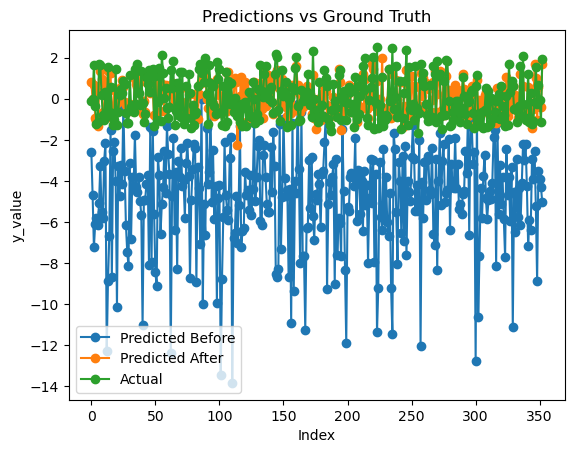

In [28]:
# Visual display of initial predictions
import matplotlib.pyplot as plt
y_pred_after = nn.forward_pass(X_train)
indices = list(range(len(y_train)))

# Create a line plot of the loss values
plt.plot(indices, y_pred_before, marker='o', linestyle='-', label='Predicted Before')
plt.plot(indices, y_pred_after, marker='o', linestyle='-', label='Predicted After')
plt.plot(indices, y_train, marker='o', linestyle='-', label='Actual')
# Add labels and a title
plt.xlabel('Index')
plt.ylabel('y_value')
plt.title('Predictions vs Ground Truth')

# Display the plot
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


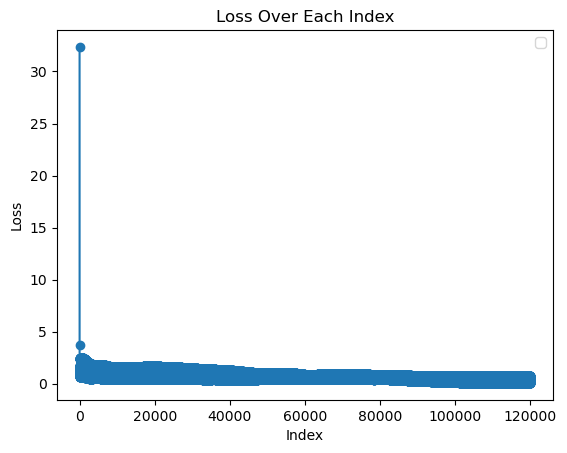

In [29]:
import matplotlib.pyplot as plt
indices = list(range(len(stored_mse)))

# Create a line plot of the loss values
plt.plot(indices, stored_mse, marker='o', linestyle='-')

# Add labels and a title
plt.xlabel('Index')
plt.ylabel('Loss')
plt.title('Loss Over Each Index')

# Display the plot
plt.legend()
plt.show()

In [35]:
y_train_unscaled = scaler.inverse_transform(y_train.reshape(-1, 1))
y_pred = nn.forward_pass(X_train)
y_pred_unscaled = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_before_unscaled = scaler.inverse_transform(y_pred_before.reshape(-1, 1))
print('RMSE Before Training:', np.sqrt(mse_func.compute(y_true=y_train_unscaled, y_pred=y_pred_before_unscaled)))
print('RMSE After Training:', np.sqrt(mse_func.compute(y_true=y_train_unscaled, y_pred=y_pred_unscaled)))
y_test_pred_unscaled = scaler.inverse_transform(nn.forward_pass(X_test).reshape(-1,1))
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1,1))
print('RMSE on test set:', np.sqrt(mse_func.compute(y_true=y_test_unscaled, y_pred=y_test_pred_unscaled)))

RMSE Before Training: 431.54476813236613
RMSE After Training: 56.622086165279974
RMSE on test set: 76.42170565994937
